# Hello World
Some Document About Code

In [50]:
# import libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
# load goemotions.json into data
with open("goemotions.json") as f:
    data = json.load(f)

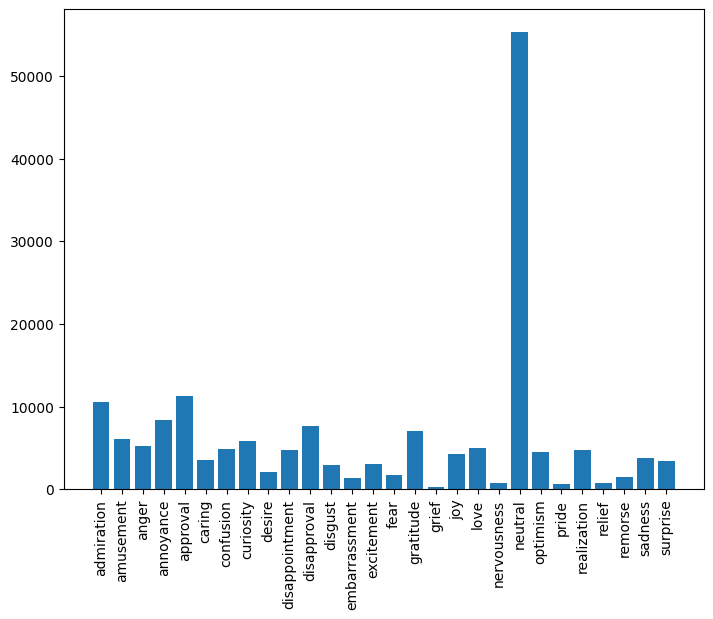

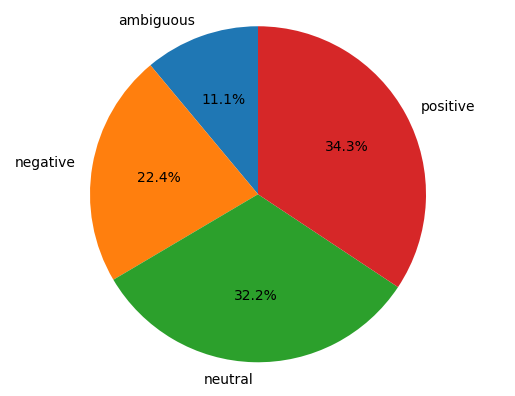

In [3]:
# Question 1.3
# create arrays for emotions and sentiments
bignumpy = np.asarray(data)
allemotions = bignumpy[:,1]
allsentiments = bignumpy[:,2]

# count the frequencies of all emotions and display in bar graph
emotions, counts = np.unique(allemotions, return_counts=True)
fig_bar = plt.figure()
ax1 = fig_bar.add_axes([0,0,1,1])
ax1.bar(emotions,counts)
plt.xticks(rotation=90)
plt.show()
fig_bar.savefig('emotions-hist.pdf', bbox_inches='tight')

# count the frequencies of all sentiments and display in pie chart
sentiments, counts = np.unique(allsentiments, return_counts=True)
fig_pie = plt.figure()
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
fig_pie.savefig('sentiments-pie.pdf', bbox_inches='tight')

In [46]:
# Question 2.1
corpus = bignumpy[:,0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Number of tokens =", len(vectorizer.get_feature_names_out()))
# print(X.toarray())

y = vectorizer.fit_transform(allemotions)
print(y.nonzero()[1])
y_emo = y.nonzero()[1]

y = vectorizer.fit_transform(allsentiments)
print(y.nonzero()[1])
y_sent = y.nonzero()[1]

# print(y.toarray())


Number of tokens = 30449
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[26 20 18 ...  5  0  2]
[1 2 3 ... 3 3 1]


In [47]:

# Question 2.2

X_emo_train, X_emo_test, y_emo_train, y_emo_test = train_test_split(X, y_emo, test_size=0.2, random_state=0)
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(X, y_sent, test_size=0.2, random_state=0)


# Reddit post words
# print(X_train)
print("Size of training data set X: ")
print(X_emo_train.shape)
# print(X_test)
print("Size of testing data set X: ")
print(X_emo_test.shape)

# Emotions

print("Size of training data set for emotions, y: ")
print(y_emo_train.shape)

print("Size of testing data set for emotions, y: ")
print(y_emo_test.shape)

# Sentiment

print("Size of training data set for sentiment, y: ")
print(y_sent_train.shape)

print("Size of testing data set for sentiment, y: ")
print(y_sent_test.shape)

# mymessagetest = "I am so happy to be here! let's go!"

Size of training data set X: 
(137456, 30449)
Size of testing data set X: 
(34364, 30449)
Size of training data set for emotions, y: 
(137456,)
Size of testing data set for emotions, y: 
(34364,)
Size of training data set for sentiment, y: 
(137456,)
Size of testing data set for sentiment, y: 
(34364,)


In [48]:
# Question 2.3.1 - Naive Bayes

# Emotions
clf = MultinomialNB()
clf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = clf.predict(X_emo_test)

print("Accuracy % of Multinomial Naive Bayes Classification on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)

# Sentiment
clf = MultinomialNB()
clf.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = clf.predict(X_sent_test)

print("Accuracy % of Multinomial Naive Bayes Classification on sentiments:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)

[20 20 20 ... 20 20 20]
Accuracy % of Naive Bayes on emotions: 38.444302176696546
[2 2 2 ... 2 2 2]
Accuracy % of Naive Bayes on emotions: 54.536724479106034


In [53]:
# Question 2.3.2 - Decision Tree

# Emotions
# criterion="entropy"
dtc=DecisionTreeClassifier()
dtc.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = dtc.predict(X_emo_test)
print(y_emo_pred)

print("Accuracy % of Decision Tree on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)

# Sentiment
# criterion="entropy"
dtc=DecisionTreeClassifier()
dtc.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = dtc.predict(X_sent_test)
print(y_sent_pred)

print("Accuracy % of Decision Tree on sentiment:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)


[ 7  4  3 ... 20 10 20]
Accuracy % of Decision Tree on emotions: 36.148294727039925
[0 3 1 ... 2 1 2]
Accuracy % of Decision Tree on emotions: 54.45524385985333


In [ ]:
# Question 2.3.3 - Multi-Layered Perceptron

